Automatically created module for IPython interactive environment


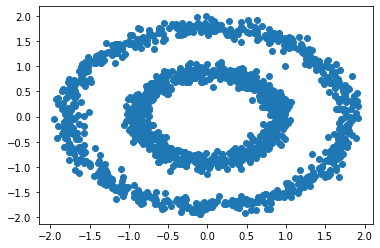

In [19]:
%matplotlib inline
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)
n_samples =1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
plot_num = 1
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
datasets = [(noisy_circles, {'damping': .77, 'preference': -240,'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25})]
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    X = StandardScaler().fit_transform(X)
    plt.scatter(X[:,0], X[:,1])
    plt.show()


In [2]:
import numpy as np
import scipy
# example of generating a small classification dataset
#from sklearn.datasets import make_blobs
# generate 2d classification dataset
# summarize
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(1500, 2) (1500,)
[[-1.21167878 -1.2468857 ]
 [ 1.6635849   0.34300942]
 [ 0.97909317 -0.00958214]
 [ 1.55889486  0.67099475]
 [ 0.7774611  -0.52524609]]
[0 0 1 0 1]


In [3]:
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
	# estimate parameters
	mu = np.mean(data)
	sigma = np.std(data)
	print(mu, sigma)
	# fit distribution
	dist = scipy.stats.norm(mu, sigma)
	return dist



In [4]:
# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)


(750, 2) (750, 2)


In [5]:
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

0.5 0.5


In [6]:
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

-0.00024387367513879828 1.2625428525926319
0.001331268285022863 1.2637725409979934
0.0002438736751388859 0.6371698568031308
-0.0013312682850228038 0.6347246805261191


In [7]:
def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

In [16]:
z=[]
a1=[]
a2=[]
for i in range(0,1500):
    Xsample = X[i]
    py0 = probability(Xsample, priory0, distX1y0, distX2y0)
    py1 = probability(Xsample, priory1, distX1y1, distX2y1)
    if py0 > py1:
        a1.append(Xsample)
        z.append(0)
    elif py1>py0:
        a2.append(Xsample)
        z.append(1)
z=np.array(z)
a1=np.array(a1)
a2=np.array(a2)
z.shape

(1500,)

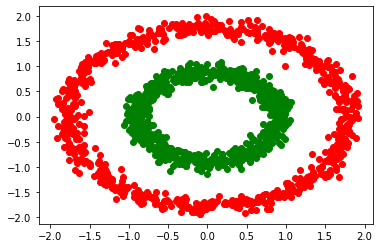

In [18]:
plt.scatter(a1.T[0],a1.T[1],label='Class1',color='red',marker='o')
plt.scatter(a2.T[0],a2.T[1],label='Class1',color='green',marker='o')